In [32]:
import pandas as pd
import numpy as np
pd.set_option('display.max_rows', 200)
## to make it possible to display multiple output inside one cell 
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
from sklearn.preprocessing import OneHotEncoder
hot = OneHotEncoder()
from sklearn.preprocessing import PowerTransformer
from scipy.stats import boxcox
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from scipy.stats import boxcox
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer

**Background**: You are working as an analyst for a real estate company. Your company wants to build a machine learning model to predict the selling prices of houses based on a variety of features on which the value of the house is evaluated.

**Objective**: The task is to build a model that will predict the price of a house based on features provided in the dataset. The senior management also wants to explore the characteristics of the houses using some business intelligence tool. One of those parameters include understanding which factors are responsible for higher property value - \$650K and above.
The questions have been provided later in the document for which you can use tableau.

**Data**: The data set consists of information on some 22,000 properties.  The dataset consisted of historic data of houses sold between May 2014 to May 2015.
These are the definitions of data points provided:
(You can find more detailed explanation in this [Link](https://geodacenter.github.io/data-and-lab/KingCounty-HouseSales2015/))

- **Id**: Unique identification number for the property.
- **date**: date the house was sold.
- **price**: price of the house.
- **waterfront**: house which has a view to a waterfront.
- **condition**: How good the condition is (overall). **1** indicates worn out property and **5** excellent.
- **grade**: Overall grade given to the housing unit, based on King County grading system. 1 poor ,13 excellent.
- **Sqft_above**: square footage of house apart from basement.
- **Sqft_living15**: Living room area in 2015(implies - some renovations). This might or might not have affected the lotsize area.
- **Sqft_lot15**: lotSize area in 2015(implies - some renovations).

### Exploring the data

We encourage you to thoroughly understand your data and take the necessary steps to prepare your data for modeling before building exploratory or predictive models. Since this is a regression task, you can use linear regression  for building a model. You are also encouraged to use other models in your project if necessary.
To explore the data, you can use the techniques that have been discussed in class. Some of them include using the describe method, checking null values, using _matplotlib_ and _seaborn_ for developing visualizations.
The data has a number of categorical and numerical variables. Explore the nature of data for these variables before you start with the data cleaning process and then data pre-processing (scaling numerical variables and encoding categorical variables).
You can  also use tableau to visually explore the data further.

### Model

Build a regression model that best fits your data. You can use the measures of accuracies that have been discussed in class.

Framework DMAIC:
https://asq.org/quality-resources/dmaic#:~:text=Define%2C%20measure%2C%20analyze%2C%20improve%2C%20and%20control%20(DMAIC,phases%20shown%20in%20Figure%201

Zip code Map
https://www.zipdatamaps.com/98028

Define:
The task is to build a model that will predict the price of a house based on features provided in the dataset. The senior management also wants to explore the characteristics of the houses using some business intelligence tool. One of those parameters include understanding which factors are responsible for higher property value - $650K and above. The questions have been provided later in the document for which you can use tableau.

For this ends, we will create 2 regression models: 1 general and the other for high tier houses
Measure:
 

ToDos
1. Remove duplicates by ID
2. quitar year built y year remnovated
3. Review bedroom categorical conversion
4. Review year renovation to binary vs condition of house (categorical variable)
5. Review inclusion of geo data

Link to documentation about the data set: https://geodacenter.github.io/data-and-lab/KingCounty-HouseSales2015/

In [33]:
#df = pd.read_csv("C:/Users/fprie/OneDrive/Dokumente/GitHub/MidTermProject/kc_house_data.csv") ruta Fabian
df = pd.read_csv("kc_house_data.csv")

In [34]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

# Measure phase

## Numerical variables

In [36]:
numerical = df.iloc[:,[2,3,4,5,6,7,12,13,14,15,19,20]].reset_index(drop=True)
numerical.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,1180,0,1955,0,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,2170,400,1951,1991,1690,7639
2,180000.0,2,1.00,770,10000,1.0,770,0,1933,0,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,1050,910,1965,0,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,1680,0,1987,0,1800,7503


## Distribution of Numerical variables

(<Figure size 2016x2880 with 1 Axes>, <AxesSubplot:>)

<AxesSubplot:>

<AxesSubplot:xlabel='price', ylabel='Count'>

<AxesSubplot:>

<AxesSubplot:xlabel='bedrooms', ylabel='Count'>

<AxesSubplot:>

<AxesSubplot:xlabel='bathrooms', ylabel='Count'>

<AxesSubplot:>

<AxesSubplot:xlabel='sqft_living', ylabel='Count'>

<AxesSubplot:>

<AxesSubplot:xlabel='sqft_lot', ylabel='Count'>

<AxesSubplot:>

<AxesSubplot:xlabel='floors', ylabel='Count'>

<AxesSubplot:>

<AxesSubplot:xlabel='sqft_above', ylabel='Count'>

<AxesSubplot:>

<AxesSubplot:xlabel='sqft_basement', ylabel='Count'>

<AxesSubplot:>

<AxesSubplot:xlabel='yr_built', ylabel='Count'>

<AxesSubplot:>

<AxesSubplot:xlabel='yr_renovated', ylabel='Count'>

<AxesSubplot:>

<AxesSubplot:xlabel='sqft_living15', ylabel='Count'>

<AxesSubplot:>

<AxesSubplot:xlabel='sqft_lot15', ylabel='Count'>

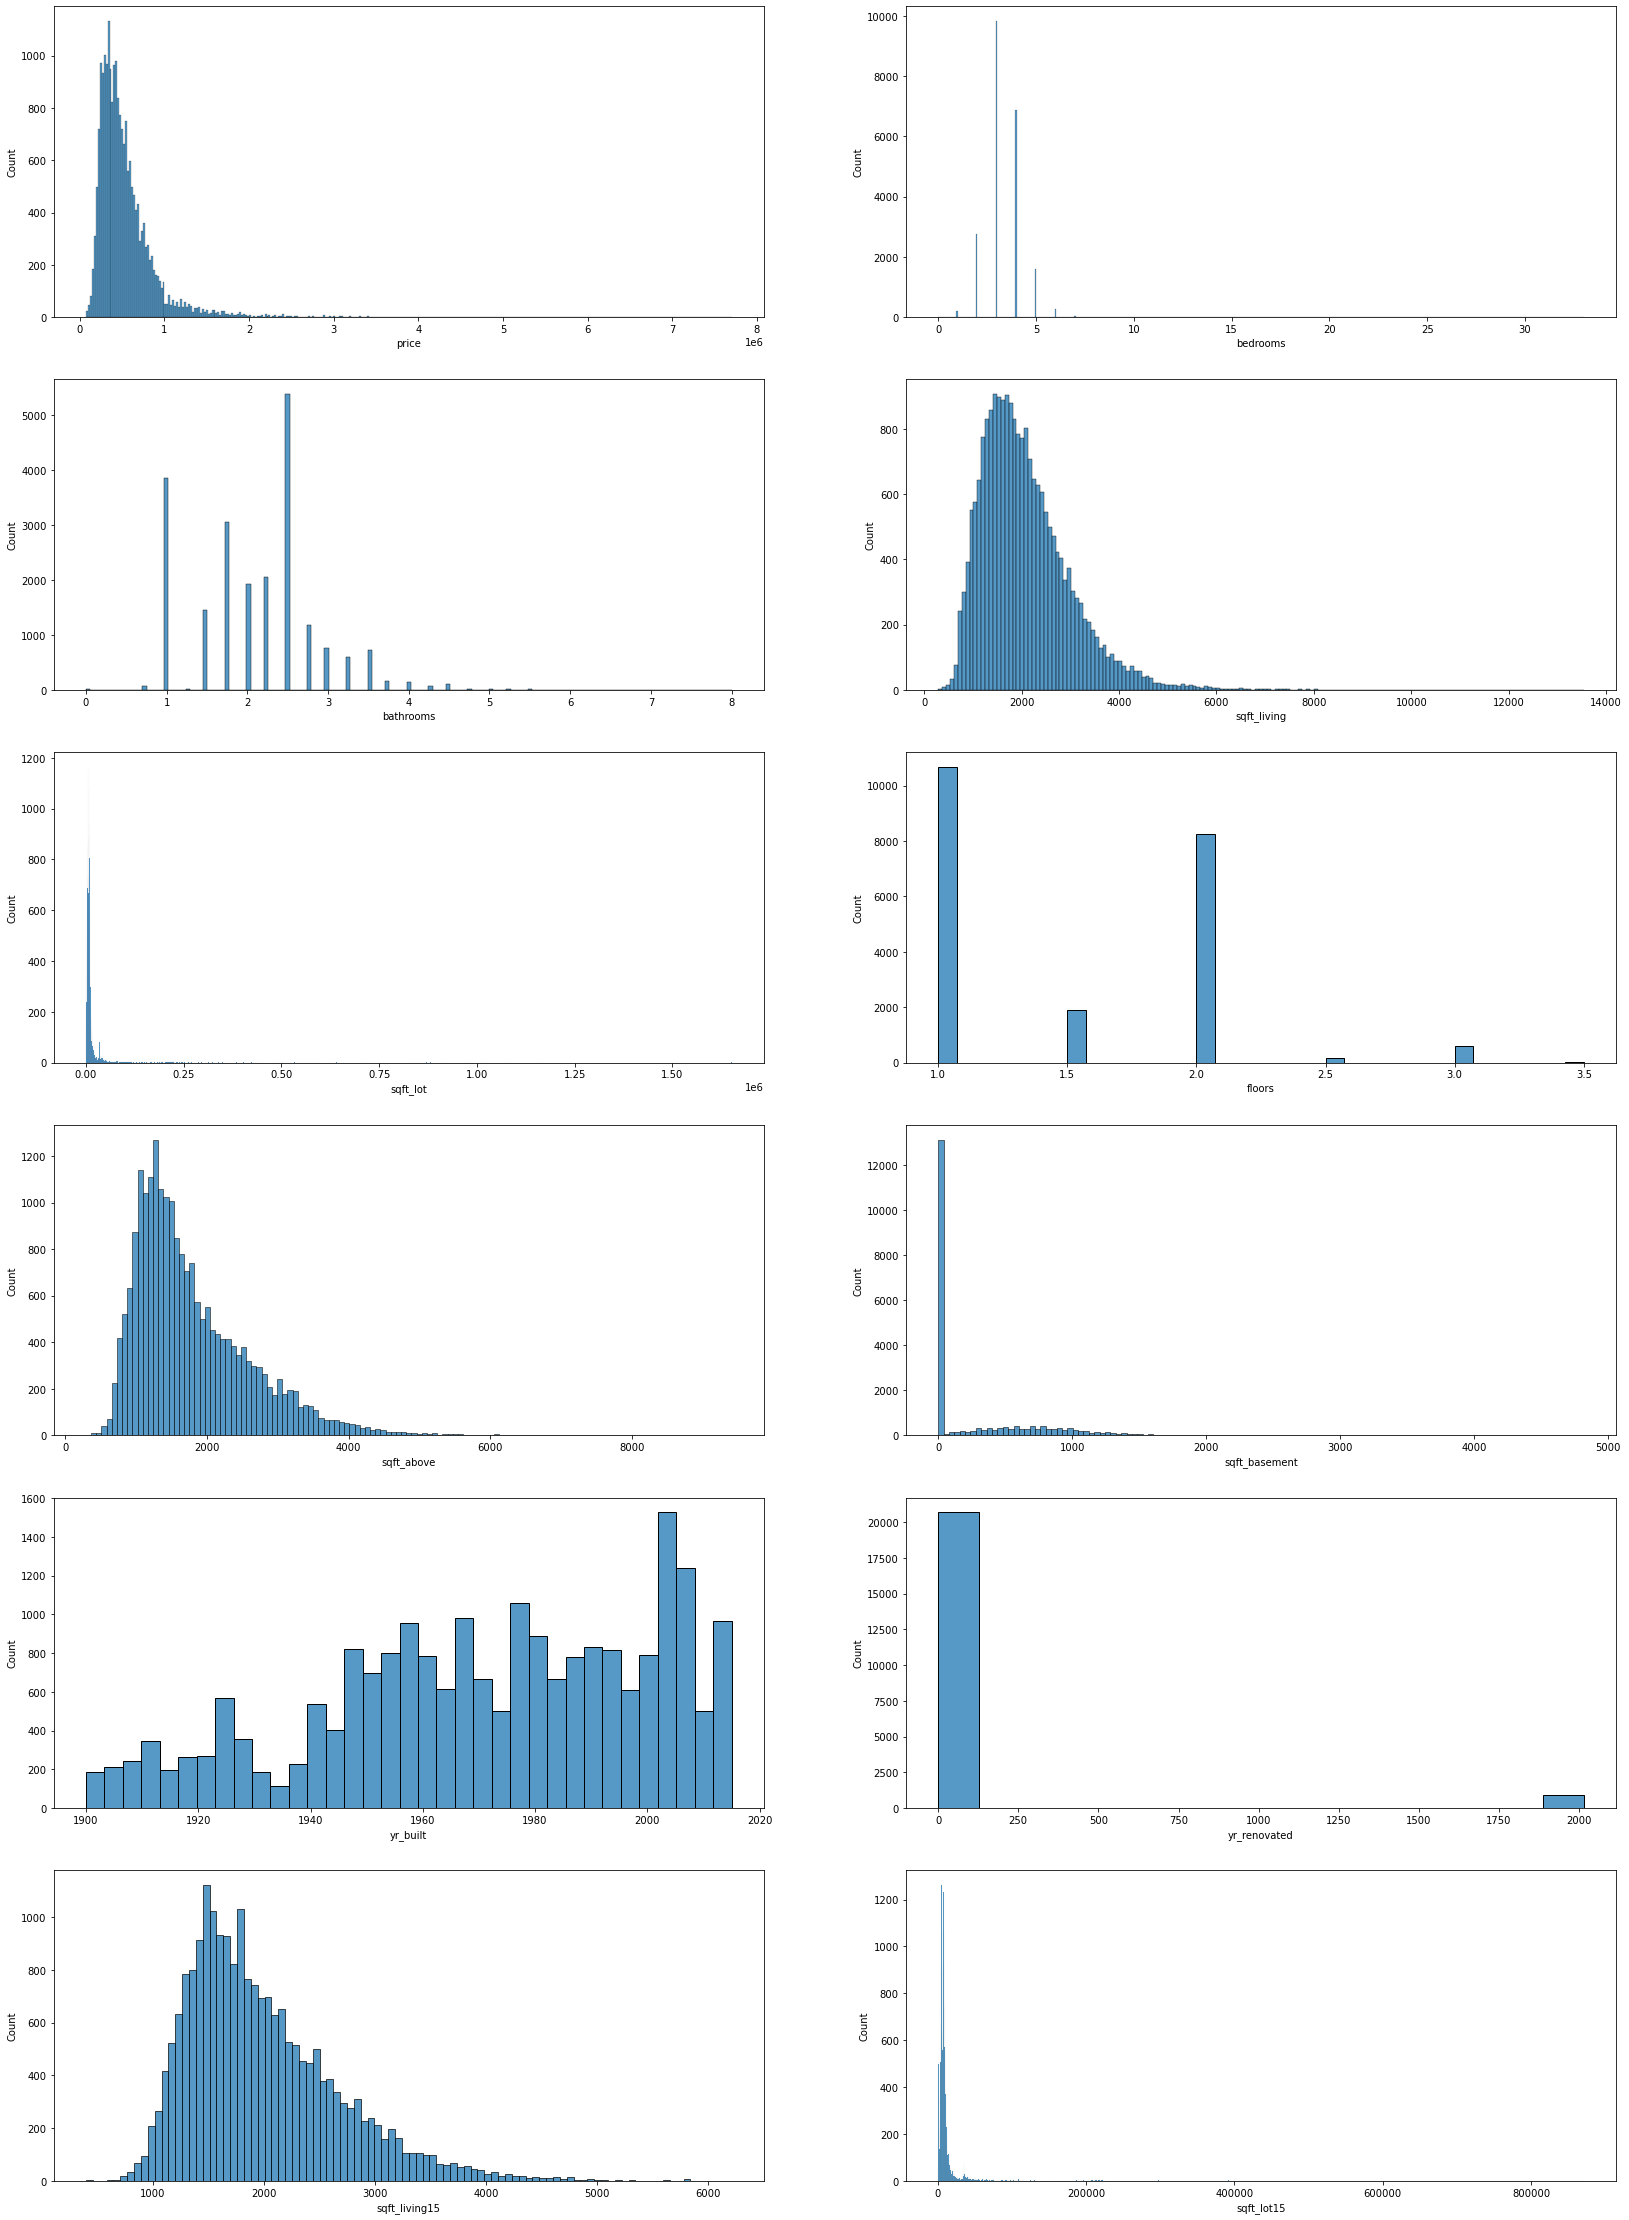

In [37]:
plt.subplots(figsize=(28, 40))
count=1
for i in numerical:
    plt.subplot(6,2,count)
    sns.histplot(numerical[i])
    count+=1
plt.show()

In [38]:
numerical

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,1180,0,1955,0,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,2170,400,1951,1991,1690,7639
2,180000.0,2,1.00,770,10000,1.0,770,0,1933,0,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,1050,910,1965,0,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,1680,0,1987,0,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,1131,3.0,1530,0,2009,0,1530,1509
21609,400000.0,4,2.50,2310,5813,2.0,2310,0,2014,0,1830,7200
21610,402101.0,2,0.75,1020,1350,2.0,1020,0,2009,0,1020,2007
21611,400000.0,3,2.50,1600,2388,2.0,1600,0,2004,0,1410,1287


## Correlation of Numerical variables

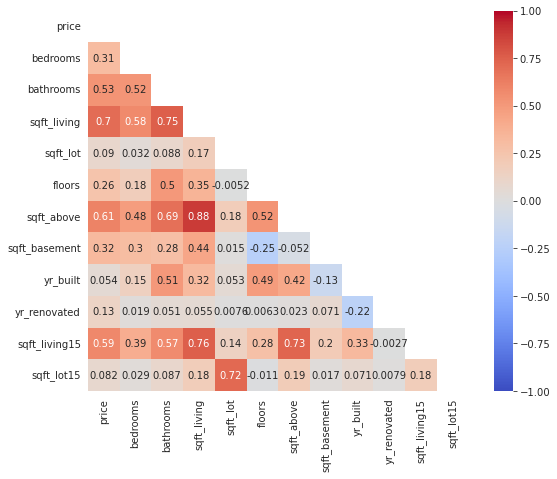

In [39]:
corr = numerical.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(9, 7))
    ax = sns.heatmap(corr, mask=mask,cmap='coolwarm', vmin=-1,vmax=1,annot=True, square=True)

In [40]:
numerical

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,1180,0,1955,0,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,2170,400,1951,1991,1690,7639
2,180000.0,2,1.00,770,10000,1.0,770,0,1933,0,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,1050,910,1965,0,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,1680,0,1987,0,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,1131,3.0,1530,0,2009,0,1530,1509
21609,400000.0,4,2.50,2310,5813,2.0,2310,0,2014,0,1830,7200
21610,402101.0,2,0.75,1020,1350,2.0,1020,0,2009,0,1020,2007
21611,400000.0,3,2.50,1600,2388,2.0,1600,0,2004,0,1410,1287


In [41]:
dif_sqft = (numerical["sqft_above"] + numerical["sqft_basement"]) - numerical["sqft_living"]
dif_sqft

0        0
1        0
2        0
3        0
4        0
        ..
21608    0
21609    0
21610    0
21611    0
21612    0
Length: 21613, dtype: int64

In [42]:
numerical = numerical.drop(["sqft_living", "sqft_living15", "sqft_lot15"], axis=1)
numerical

,price,bedrooms,bathrooms,sqft_lot,floors,sqft_above,sqft_basement,yr_built,yr_renovated
0,221900.0,3,1.00,5650,1.0,1180,0,1955,0
1,538000.0,3,2.25,7242,2.0,2170,400,1951,1991
2,180000.0,2,1.00,10000,1.0,770,0,1933,0
3,604000.0,4,3.00,5000,1.0,1050,910,1965,0
4,510000.0,3,2.00,8080,1.0,1680,0,1987,0
...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1131,3.0,1530,0,2009,0
21609,400000.0,4,2.50,5813,2.0,2310,0,2014,0
21610,402101.0,2,0.75,1350,2.0,1020,0,2009,0
21611,400000.0,3,2.50,2388,2.0,1600,0,2004,0


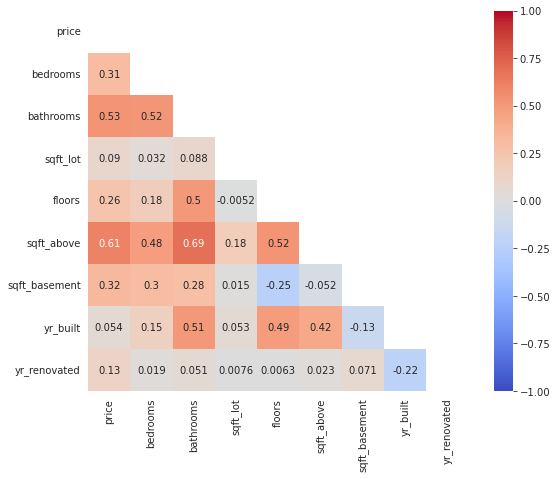

In [43]:
corr = numerical.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(9, 7))
    ax = sns.heatmap(corr, mask=mask,cmap='coolwarm', vmin=-1,vmax=1,annot=True, square=True)

In [44]:
time = df[["date", "yr_built", "yr_renovated"]]
time.head()

,date,yr_built,yr_renovated
0,20141013T000000,1955,0
1,20141209T000000,1951,1991
2,20150225T000000,1933,0
3,20141209T000000,1965,0
4,20150218T000000,1987,0


In [45]:
time["date"] = pd.to_datetime(time["date"])
time['year'] = time['date'].dt.year
#time['month'] = time['date'].dt.month
#time['day'] = time['date'].dt.day
time.head()

C:\Users\fprie\AppData\Local\Temp\ipykernel_23952\3088125887.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  time["date"] = pd.to_datetime(time["date"])
C:\Users\fprie\AppData\Local\Temp\ipykernel_23952\3088125887.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  time['year'] = time['date'].dt.year


,date,yr_built,yr_renovated,year
0,2014-10-13,1955,0,2014
1,2014-12-09,1951,1991,2014
2,2015-02-25,1933,0,2015
3,2014-12-09,1965,0,2014
4,2015-02-18,1987,0,2015


In [46]:
time['condition_years']= np.where((time['yr_renovated'])>0, time['year']-time['yr_renovated'],time['year']-time['yr_built'] )
time=time['condition_years']
time.head()

C:\Users\fprie\AppData\Local\Temp\ipykernel_23952\772838873.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  time['condition_years']= np.where((time['yr_renovated'])>0, time['year']-time['yr_renovated'],time['year']-time['yr_built'] )


0    59
1    23
2    82
3    49
4    28
Name: condition_years, dtype: int64

## Linear Regresion - Numerical variables

In [47]:
numerical = pd.concat([numerical,time],axis=1)
numerical

,price,bedrooms,bathrooms,sqft_lot,floors,sqft_above,sqft_basement,yr_built,yr_renovated,condition_years
0,221900.0,3,1.00,5650,1.0,1180,0,1955,0,59
1,538000.0,3,2.25,7242,2.0,2170,400,1951,1991,23
2,180000.0,2,1.00,10000,1.0,770,0,1933,0,82
3,604000.0,4,3.00,5000,1.0,1050,910,1965,0,49
4,510000.0,3,2.00,8080,1.0,1680,0,1987,0,28
...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1131,3.0,1530,0,2009,0,5
21609,400000.0,4,2.50,5813,2.0,2310,0,2014,0,1
21610,402101.0,2,0.75,1350,2.0,1020,0,2009,0,5
21611,400000.0,3,2.50,2388,2.0,1600,0,2004,0,11


In [48]:
numerical["condition_years"].unique()

array([ 59,  23,  82,  49,  28,  13,  19,  52,  55,  12,  50,  72,  87,
        37, 115,  36,  20,  98,  93,  46,  67,  29,  73,  99, 105,  66,
        10,  11,   9,  85,  33,  81, 110,  18,  14,  30,   0,  92,  62,
        64,  34,  88,   6,  24,  60,  41,  35,  89,  25,  43,  58,  74,
        22,  51,  53,   8,  26,  75,  48,  39, 104,  31,   4,  15,  69,
        65,  90,  27,  47,  54, 109,   7,  68,  61,   1,  38,  16, 113,
        21, 114,  94,  45, 100,  96,  97,  86, 103,  78,  77,  76, 107,
        84,  40,  57, 102,  17,  71,  63,  91,  42,   3,  95,   2,  32,
        56,  70,  44, 112,   5,  80, 101,  83, 106, 108, 111,  79,  -1],
      dtype=int64)

In [24]:
X=numerical.drop('price', axis=1)
y=numerical.price

In [25]:
#First linear regression iteration, only numerical values

X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=.30,random_state=123)

std_scaler=StandardScaler().fit(X_train)   ##. finding the parameters ( mean, variance from the training set )

X_train_scaled=std_scaler.transform(X_train)

X_test_scaled=std_scaler.transform(X_test)

print(X_train_scaled)
print("--------")
print(X_test_scaled)

X_train_const_scaled = sm.add_constant(X_train_scaled) # adding a constant

model = sm.OLS(y_train, X_train_const_scaled).fit()
predictions_train = model.predict(X_train_const_scaled) 

X_test_const_scaled = sm.add_constant(X_test_scaled) # adding a constant
predictions_test = model.predict(X_test_const_scaled) 
print_model = model.summary()
print(print_model)

[[-0.39525584  1.79897315 -0.32634112 ...  1.18955273 -0.21187196
  -1.14030232]
 [ 0.67295166  0.82545436 -0.21579039 ... -1.53121818 -0.21187196
   1.63677709]
 [ 0.67295166 -0.47257069 -0.15496335 ... -0.44290982 -0.21187196
   0.56065881]
 ...
 [-1.46346333 -1.44608948 -0.23799709 ... -1.15711218 -0.21187196
   1.25492867]
 [-0.39525584  1.14996062 -0.32812731 ...  1.18955273 -0.21187196
  -1.14030232]
 [ 0.67295166  0.5009481  -0.27118644 ...  1.39361054 -0.21187196
  -1.34858328]]
--------
[[ 0.67295166  0.5009481  -0.1523082  ...  0.16926364 -0.21187196
  -0.09889755]
 [-1.46346333 -1.44608948 -0.26503133 ... -0.74899654 -0.21187196
   0.83836676]
 [-0.39525584  0.5009481  -0.17473213 ...  1.01950454 -0.21187196
  -0.93202137]
 ...
 [ 0.67295166  1.14996062  0.48309301 ...  0.23728291 -0.21187196
  -0.13361104]
 [ 0.67295166 -0.47257069 -0.26696234 ... -1.53121818 -0.21187196
   1.63677709]
 [ 0.67295166  0.5009481  -0.18095966 ...  0.23728291 -0.21187196
  -0.16832453]]
       

In [58]:
categorical.columns

Index(['id', 'date', 'waterfront', 'view', 'condition', 'grade', 'zipcode',
       'lat', 'long'],
      dtype='object')

## Categorical variables

In [54]:
categorical = df.iloc[:,[0,1,8,9,10,11,16,17,18]].reset_index(drop=True)
categorical.head()

,id,date,waterfront,view,condition,grade,zipcode,lat,long
0,7129300520,20141013T000000,0,0,3,7,98178,47.5112,-122.257
1,6414100192,20141209T000000,0,0,3,7,98125,47.7210,-122.319
2,5631500400,20150225T000000,0,0,3,6,98028,47.7379,-122.233
3,2487200875,20141209T000000,0,0,5,7,98136,47.5208,-122.393
4,1954400510,20150218T000000,0,0,3,8,98074,47.6168,-122.045


In [62]:
it1 = categorical.drop(["id", "date", "zipcode", "lat", "long"], axis=1)
it1

,waterfront,view,condition,grade
0,0,0,3,7
1,0,0,3,7
2,0,0,3,6
3,0,0,5,7
4,0,0,3,8
...,...,...,...,...
21608,0,0,3,8
21609,0,0,3,8
21610,0,0,3,7
21611,0,0,3,8


In [52]:
df['id'].value_counts()

795000620     3
8651510380    2
2568300045    2
9353300600    2
4139480200    2
             ..
2767603649    1
1446403617    1
5602000275    1
1786200010    1
1523300157    1
Name: id, Length: 21436, dtype: int64

In [66]:
reg2 = pd.concat([numerical,it1],axis=1)
reg2

,price,bedrooms,bathrooms,sqft_lot,floors,sqft_above,sqft_basement,yr_built,yr_renovated,condition_years,waterfront,view,condition,grade
0,221900.0,3,1.00,5650,1.0,1180,0,1955,0,59,0,0,3,7
1,538000.0,3,2.25,7242,2.0,2170,400,1951,1991,23,0,0,3,7
2,180000.0,2,1.00,10000,1.0,770,0,1933,0,82,0,0,3,6
3,604000.0,4,3.00,5000,1.0,1050,910,1965,0,49,0,0,5,7
4,510000.0,3,2.00,8080,1.0,1680,0,1987,0,28,0,0,3,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1131,3.0,1530,0,2009,0,5,0,0,3,8
21609,400000.0,4,2.50,5813,2.0,2310,0,2014,0,1,0,0,3,8
21610,402101.0,2,0.75,1350,2.0,1020,0,2009,0,5,0,0,3,7
21611,400000.0,3,2.50,2388,2.0,1600,0,2004,0,11,0,0,3,8


In [65]:
X=reg2.drop('price', axis=1)
y=reg2.price

In [67]:
#First linear regression iteration, only numerical values

X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=.30,random_state=123)

std_scaler=StandardScaler().fit(X_train)   ##. finding the parameters ( mean, variance from the training set )

X_train_scaled=std_scaler.transform(X_train)

X_test_scaled=std_scaler.transform(X_test)

print(X_train_scaled)
print("--------")
print(X_test_scaled)

X_train_const_scaled = sm.add_constant(X_train_scaled) # adding a constant

model = sm.OLS(y_train, X_train_const_scaled).fit()
predictions_train = model.predict(X_train_const_scaled) 

X_test_const_scaled = sm.add_constant(X_test_scaled) # adding a constant
predictions_test = model.predict(X_test_const_scaled) 
print_model = model.summary()
print(print_model)

[[-0.39525584  1.79897315 -0.32634112 ... -0.30272715 -0.62358292
   0.30058047]
 [ 0.67295166  0.82545436 -0.21579039 ... -0.30272715  0.91744714
  -0.55711133]
 [ 0.67295166 -0.47257069 -0.15496335 ... -0.30272715  0.91744714
   0.30058047]
 ...
 [-1.46346333 -1.44608948 -0.23799709 ... -0.30272715  0.91744714
  -0.55711133]
 [-0.39525584  1.14996062 -0.32812731 ... -0.30272715 -0.62358292
   0.30058047]
 [ 0.67295166  0.5009481  -0.27118644 ... -0.30272715 -0.62358292
  -0.55711133]]
--------
[[ 0.67295166  0.5009481  -0.1523082  ... -0.30272715 -0.62358292
   0.30058047]
 [-1.46346333 -1.44608948 -0.26503133 ... -0.30272715 -0.62358292
  -0.55711133]
 [-0.39525584  0.5009481  -0.17473213 ... -0.30272715 -0.62358292
   1.15827227]
 ...
 [ 0.67295166  1.14996062  0.48309301 ... -0.30272715 -0.62358292
   1.15827227]
 [ 0.67295166 -0.47257069 -0.26696234 ... -0.30272715  2.4584772
  -0.55711133]
 [ 0.67295166  0.5009481  -0.18095966 ... -0.30272715 -0.62358292
  -0.55711133]]
        

In [68]:
reg2.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_lot', 'floors', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'condition_years',
       'waterfront', 'view', 'condition', 'grade'],
      dtype='object')

In [56]:
df.groupby("id").filter(lambda x: len(x) > 1)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
93,6021501535,20140725T000000,430000.0,3,1.50,1580,5000,1.0,0,0,...,8,1290,290,1939,0,98117,47.6870,-122.386,1570,4500
94,6021501535,20141223T000000,700000.0,3,1.50,1580,5000,1.0,0,0,...,8,1290,290,1939,0,98117,47.6870,-122.386,1570,4500
313,4139480200,20140618T000000,1384000.0,4,3.25,4290,12103,1.0,0,3,...,11,2690,1600,1997,0,98006,47.5503,-122.102,3860,11244
314,4139480200,20141209T000000,1400000.0,4,3.25,4290,12103,1.0,0,3,...,11,2690,1600,1997,0,98006,47.5503,-122.102,3860,11244
324,7520000520,20140905T000000,232000.0,2,1.00,1240,12092,1.0,0,0,...,6,960,280,1922,1984,98146,47.4957,-122.352,1820,7460
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20670,8564860270,20150330T000000,502000.0,4,2.50,2680,5539,2.0,0,0,...,8,2680,0,2013,0,98045,47.4759,-121.734,2680,5992
20779,6300000226,20140626T000000,240000.0,4,1.00,1200,2171,1.5,0,0,...,7,1200,0,1933,0,98133,47.7076,-122.342,1130,1598
20780,6300000226,20150504T000000,380000.0,4,1.00,1200,2171,1.5,0,0,...,7,1200,0,1933,0,98133,47.7076,-122.342,1130,1598
21580,7853420110,20141003T000000,594866.0,3,3.00,2780,6000,2.0,0,0,...,9,2780,0,2013,0,98065,47.5184,-121.886,2850,6000


In [266]:
# it1 = df.drop([B'id', C'date', M'price', M'bedrooms', M'bathrooms', M'sqft_living', THE DROP fuctions WITH ALL THE COLUMNS
#       M'sqft_lot', M'floors', M'waterfront', M'view', M'condition', M'grade',
#       M'sqft_above', M'sqft_basement', C'yr_built', C'yr_renovated', C'zipcode',
#       C'lat', C'long', C'sqft_living15', C'sqft_lot15'], axis=1, inplace=True)

In [38]:
# Drop id, due to irrelevancy
# Drop lat, long, Shape_leng, and Shape_Area (the latter appear in the documentation online but are nowwhere to see in
#  the df) due to redundancy as we already have other more relevant geographical features
it1 = df.drop(["id", "date", "yr_built", "yr_renovated", "zipcode", "lat", "long"], axis=1)
it1["price"] = pd.to_numeric(it1["price"])
it2 = it1

In [39]:
it1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21613 non-null  float64
 1   bedrooms       21613 non-null  int64  
 2   bathrooms      21613 non-null  float64
 3   sqft_living    21613 non-null  int64  
 4   sqft_lot       21613 non-null  int64  
 5   floors         21613 non-null  float64
 6   waterfront     21613 non-null  int64  
 7   view           21613 non-null  int64  
 8   condition      21613 non-null  int64  
 9   grade          21613 non-null  int64  
 10  sqft_above     21613 non-null  int64  
 11  sqft_basement  21613 non-null  int64  
 12  sqft_living15  21613 non-null  int64  
 13  sqft_lot15     21613 non-null  int64  
dtypes: float64(3), int64(11)
memory usage: 2.3 MB


In [40]:
numerical = it1.iloc[:,[0,1,2,3,4,5,10,11,12,13]].reset_index(drop=True)
categorical = it1.iloc[:,[6,7,8,9,]].reset_index(drop=True)

In [41]:
numerical

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,1180,0,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,2170,400,1690,7639
2,180000.0,2,1.00,770,10000,1.0,770,0,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,1050,910,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,1680,0,1800,7503
...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,1131,3.0,1530,0,1530,1509
21609,400000.0,4,2.50,2310,5813,2.0,2310,0,1830,7200
21610,402101.0,2,0.75,1020,1350,2.0,1020,0,1020,2007
21611,400000.0,3,2.50,1600,2388,2.0,1600,0,1410,1287


In [42]:
it1

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,1530,1509
21609,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,1830,7200
21610,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,1020,2007
21611,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,1410,1287


In [271]:
categorical

,waterfront,view,condition,grade
0,0,0,3,7
1,0,0,3,7
2,0,0,3,6
3,0,0,5,7
4,0,0,3,8
...,...,...,...,...
21608,0,0,3,8
21609,0,0,3,8
21610,0,0,3,7
21611,0,0,3,8


In [272]:
#print(it1["price"].value_counts()).sort_values(ascending=True)
cars_sorted = numerical.groupby("price").size().sort_values(ascending=False)
cars_sorted
type("price")
numerical.info()

price
450000.0     172
350000.0     172
550000.0     159
500000.0     152
425000.0     150
            ... 
459990.0       1
459995.0       1
460458.0       1
460940.0       1
7700000.0      1
Length: 4028, dtype: int64

str

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21613 non-null  float64
 1   bedrooms       21613 non-null  int64  
 2   bathrooms      21613 non-null  float64
 3   sqft_living    21613 non-null  int64  
 4   sqft_lot       21613 non-null  int64  
 5   floors         21613 non-null  float64
 6   sqft_above     21613 non-null  int64  
 7   sqft_basement  21613 non-null  int64  
 8   sqft_living15  21613 non-null  int64  
 9   sqft_lot15     21613 non-null  int64  
dtypes: float64(3), int64(7)
memory usage: 1.6 MB


In [273]:
#sns.pairplot(numerical)

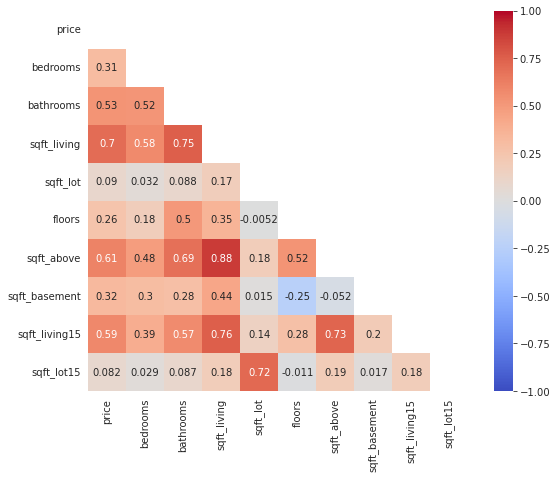

In [274]:
corr = numerical.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(9, 7))
    ax = sns.heatmap(corr, mask=mask,cmap='coolwarm', vmin=-1,vmax=1,annot=True, square=True)

(<Figure size 1008x1440 with 1 Axes>, <AxesSubplot:>)

<AxesSubplot:>

<AxesSubplot:xlabel='price', ylabel='Count'>

<AxesSubplot:>

<AxesSubplot:xlabel='bedrooms', ylabel='Count'>

<AxesSubplot:>

<AxesSubplot:xlabel='bathrooms', ylabel='Count'>

<AxesSubplot:>

<AxesSubplot:xlabel='sqft_living', ylabel='Count'>

<AxesSubplot:>

<AxesSubplot:xlabel='sqft_lot', ylabel='Count'>

<AxesSubplot:>

<AxesSubplot:xlabel='floors', ylabel='Count'>

<AxesSubplot:>

<AxesSubplot:xlabel='sqft_above', ylabel='Count'>

<AxesSubplot:>

<AxesSubplot:xlabel='sqft_basement', ylabel='Count'>

<AxesSubplot:>

<AxesSubplot:xlabel='sqft_living15', ylabel='Count'>

<AxesSubplot:>

<AxesSubplot:xlabel='sqft_lot15', ylabel='Count'>

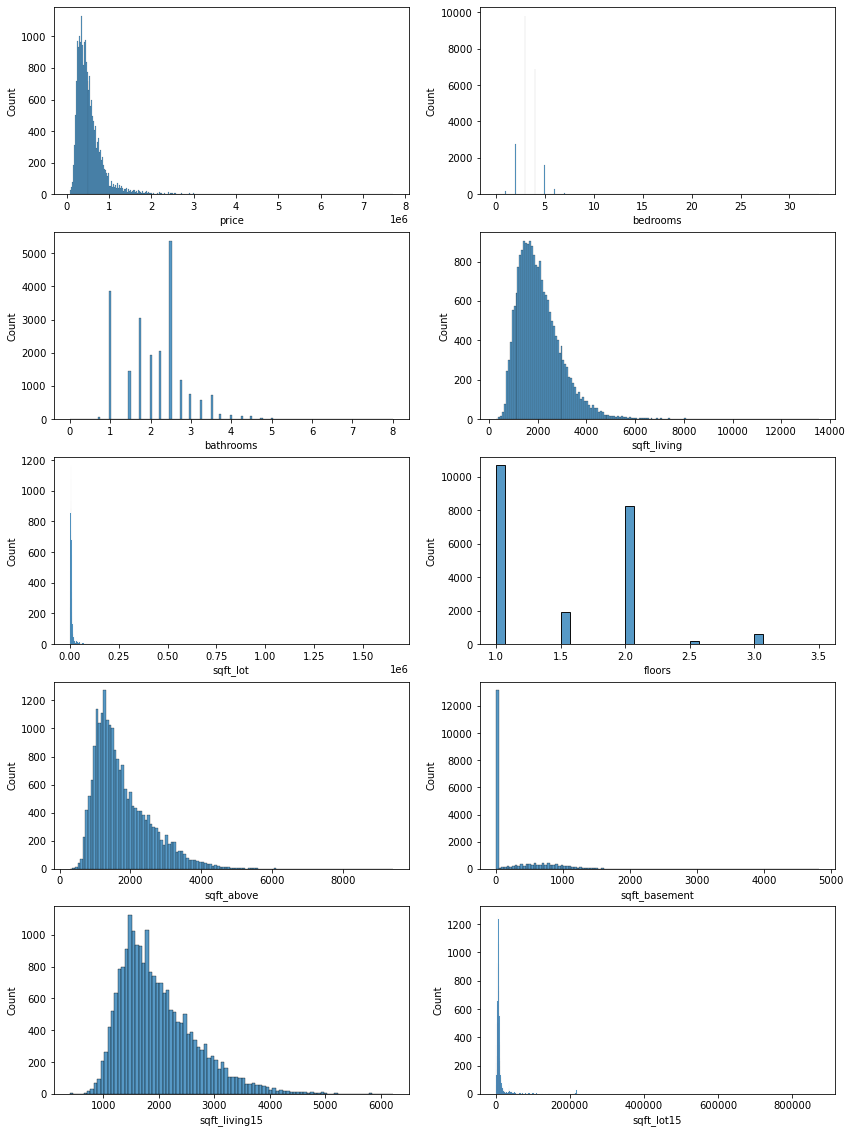

In [275]:
plt.subplots(figsize=(14, 20))
count=1
for i in numerical:
    plt.subplot(5,2,count)
    sns.histplot(numerical[i])
    count+=1
plt.show()

sns.histplot(numerical["price"])
ax.ticklabel_format(useOffset=False)

In [276]:
it1["floors"].unique()

array([1. , 2. , 1.5, 3. , 2.5, 3.5])

In [277]:
itbig = it2[it2.price > 650000]
itbig

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,sqft_living15,sqft_lot15
5,1225000.0,4,4.50,5420,101930,1.0,0,0,3,11,3890,1530,4760,101930
10,662500.0,3,2.50,3560,9796,1.0,0,0,3,8,1860,1700,2210,8925
21,2000000.0,3,2.75,3050,44867,1.0,0,4,3,9,2330,720,4110,20336
26,937000.0,3,1.75,2450,2691,2.0,0,0,3,8,1750,700,1760,3573
27,667000.0,3,1.00,1400,1581,1.5,0,0,5,8,1400,0,1860,3861
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21596,679950.0,5,2.75,3600,9437,2.0,0,0,3,9,3600,0,3550,9421
21597,1575000.0,4,3.25,3410,10125,2.0,0,0,3,10,3410,0,2290,10125
21599,810000.0,4,3.00,3990,7838,2.0,0,0,3,9,3990,0,3370,6814
21600,1537000.0,5,3.75,4470,8088,2.0,0,0,3,11,4470,0,2780,8964


(<Figure size 1008x1440 with 1 Axes>, <AxesSubplot:>)

<AxesSubplot:>

<AxesSubplot:xlabel='price', ylabel='Count'>

<AxesSubplot:>

<AxesSubplot:xlabel='bedrooms', ylabel='Count'>

<AxesSubplot:>

<AxesSubplot:xlabel='bathrooms', ylabel='Count'>

<AxesSubplot:>

<AxesSubplot:xlabel='sqft_living', ylabel='Count'>

<AxesSubplot:>

<AxesSubplot:xlabel='floors', ylabel='Count'>

<AxesSubplot:>

<AxesSubplot:xlabel='sqft_above', ylabel='Count'>

<AxesSubplot:>

<AxesSubplot:xlabel='sqft_basement', ylabel='Count'>

<AxesSubplot:>

<AxesSubplot:xlabel='sqft_living15', ylabel='Count'>

<AxesSubplot:>

<AxesSubplot:xlabel='sqft_lot15', ylabel='Count'>

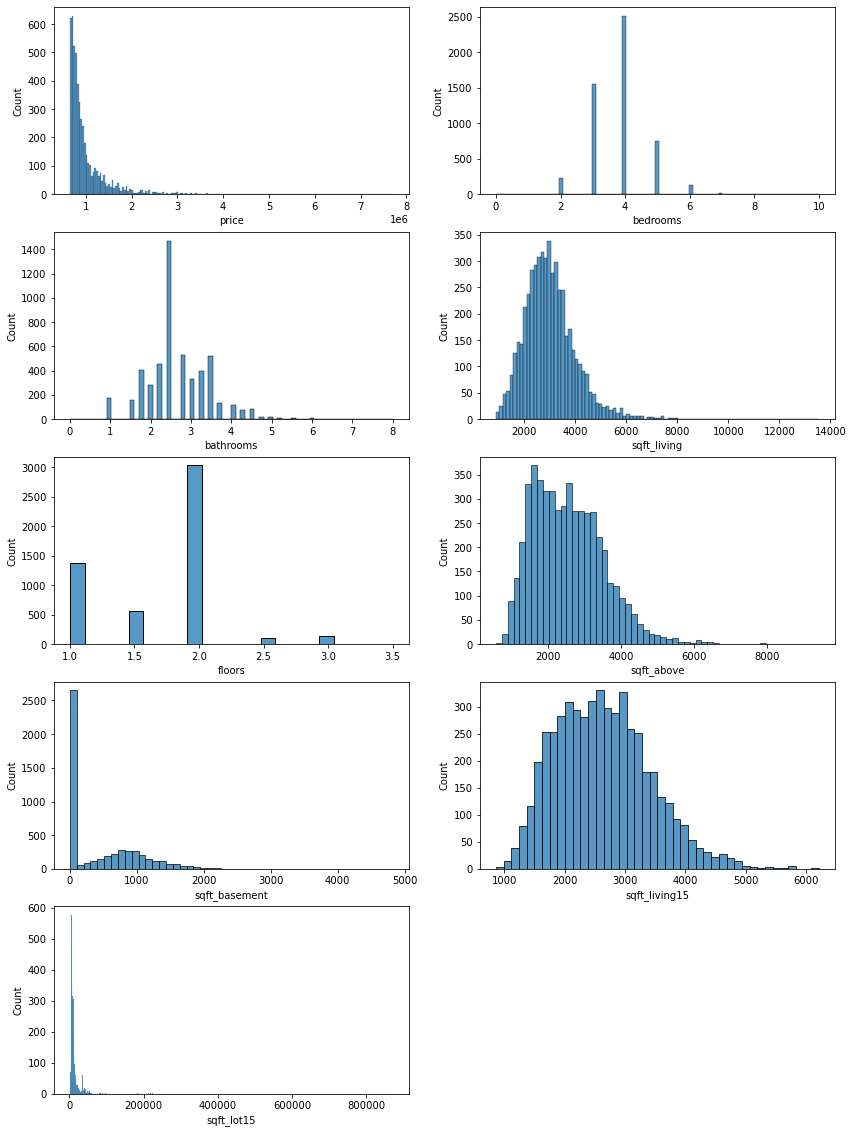

In [278]:
numericalbig = itbig.iloc[:,[0,1,2,3,5,10,11,12,13]].reset_index(drop=True)

plt.subplots(figsize=(14, 20))
count=1
for i in numericalbig:
    plt.subplot(5,2,count)
    sns.histplot(numericalbig[i])
    count+=1
plt.show()

In [279]:
numerical

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,1180,0,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,2170,400,1690,7639
2,180000.0,2,1.00,770,10000,1.0,770,0,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,1050,910,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,1680,0,1800,7503
...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,1131,3.0,1530,0,1530,1509
21609,400000.0,4,2.50,2310,5813,2.0,2310,0,1830,7200
21610,402101.0,2,0.75,1020,1350,2.0,1020,0,1020,2007
21611,400000.0,3,2.50,1600,2388,2.0,1600,0,1410,1287


In [280]:
dif = (numerical["sqft_above"] + numerical["sqft_basement"]) - numerical["sqft_living"]

In [20]:
itit = numerical
#itit["sq_total"] = itit["sqft_above"] + itit["sqft_living"]
itit = itit.drop(["sqft_living", "sqft_living15", "sqft_lot15"], axis=1)
itit = pd.concat([itit,categorical,dft],axis=1)
itit

NameError: name 'numerical' is not defined

In [282]:
numerical.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'sqft_above', 'sqft_basement', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

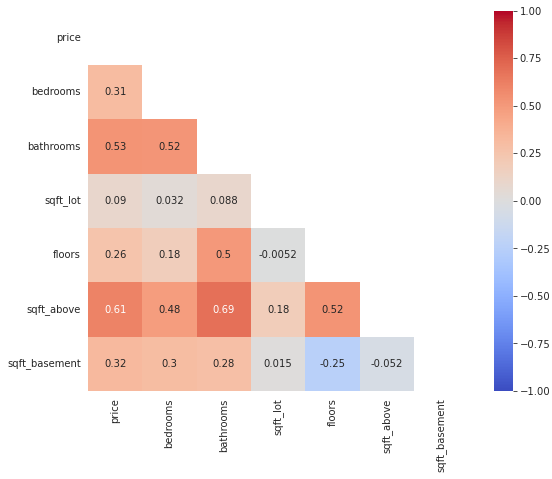

In [283]:
corr = itit.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(9, 7))
    ax = sns.heatmap(corr, mask=mask,cmap='coolwarm', vmin=-1,vmax=1,annot=True, square=True)

In [288]:
X=itit.drop('price', axis=1)
y=itit.price

In [289]:
#First linear regression iteration, only numerical values

X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=.30,random_state=123)

std_scaler=StandardScaler().fit(X_train)   ##. finding the parameters ( mean, variance from the training set )

X_train_scaled=std_scaler.transform(X_train)

X_test_scaled=std_scaler.transform(X_test)

print(X_train_scaled)
print("--------")
print(X_test_scaled)

X_train_const_scaled = sm.add_constant(X_train_scaled) # adding a constant

model = sm.OLS(y_train, X_train_const_scaled).fit()
predictions_train = model.predict(X_train_const_scaled) 

X_test_const_scaled = sm.add_constant(X_test_scaled) # adding a constant
predictions_test = model.predict(X_test_const_scaled) 
print_model = model.summary()
print(print_model)

[[-0.39525584  1.79897315 -0.32634112 ... -0.30272715 -0.62358292
   0.30058047]
 [ 0.67295166  0.82545436 -0.21579039 ... -0.30272715  0.91744714
  -0.55711133]
 [ 0.67295166 -0.47257069 -0.15496335 ... -0.30272715  0.91744714
   0.30058047]
 ...
 [-1.46346333 -1.44608948 -0.23799709 ... -0.30272715  0.91744714
  -0.55711133]
 [-0.39525584  1.14996062 -0.32812731 ... -0.30272715 -0.62358292
   0.30058047]
 [ 0.67295166  0.5009481  -0.27118644 ... -0.30272715 -0.62358292
  -0.55711133]]
--------
[[ 0.67295166  0.5009481  -0.1523082  ... -0.30272715 -0.62358292
   0.30058047]
 [-1.46346333 -1.44608948 -0.26503133 ... -0.30272715 -0.62358292
  -0.55711133]
 [-0.39525584  0.5009481  -0.17473213 ... -0.30272715 -0.62358292
   1.15827227]
 ...
 [ 0.67295166  1.14996062  0.48309301 ... -0.30272715 -0.62358292
   1.15827227]
 [ 0.67295166 -0.47257069 -0.26696234 ... -0.30272715  2.4584772
  -0.55711133]
 [ 0.67295166  0.5009481  -0.18095966 ... -0.30272715 -0.62358292
  -0.55711133]]
        

In [286]:
categorical

,waterfront,view,condition,grade
0,0,0,3,7
1,0,0,3,7
2,0,0,3,6
3,0,0,5,7
4,0,0,3,8
...,...,...,...,...
21608,0,0,3,8
21609,0,0,3,8
21610,0,0,3,7
21611,0,0,3,8


In [11]:
time = df[["date", "yr_built", "yr_renovated"]]
time

,date,yr_built,yr_renovated
0,20141013T000000,1955,0
1,20141209T000000,1951,1991
2,20150225T000000,1933,0
3,20141209T000000,1965,0
4,20150218T000000,1987,0
...,...,...,...
21608,20140521T000000,2009,0
21609,20150223T000000,2014,0
21610,20140623T000000,2009,0
21611,20150116T000000,2004,0


In [12]:
date_sold = time[["date"]]
date_sold["date"] = pd.to_datetime(date_sold["date"])
date_sold['year'] = date_sold['date'].dt.year
#date_sold['month'] = date_sold['date'].dt.month
#date_sold['day'] = date_sold['date'].dt.day
date_sold["year"].unique()

C:\Users\javie\AppData\Local\Temp/ipykernel_30308/2824718906.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  date_sold["date"] = pd.to_datetime(date_sold["date"])
C:\Users\javie\AppData\Local\Temp/ipykernel_30308/2824718906.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  date_sold['year'] = date_sold['date'].dt.year


array([2014, 2015], dtype=int64)

In [13]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [15]:
time_data_sub = date_sold[["year"]]
years = df[["yr_built","yr_renovated"]]
dft = pd.concat([time_data_sub,years],axis=1)
dft

,year,yr_built,yr_renovated
0,2014,1955,0
1,2014,1951,1991
2,2015,1933,0
3,2014,1965,0
4,2015,1987,0
...,...,...,...
21608,2014,2009,0
21609,2015,2014,0
21610,2014,2009,0
21611,2015,2004,0


In [19]:
dft['condition_years']= np.where((dft['yr_renovated'])>0, dft['year']-dft['yr_renovated'],dft['year']-dft['yr_built'] )
dft

,year,yr_built,yr_renovated,condition_years
0,2014,1955,0,59
1,2014,1951,1991,23
2,2015,1933,0,82
3,2014,1965,0,49
4,2015,1987,0,28
...,...,...,...,...
21608,2014,2009,0,5
21609,2015,2014,0,1
21610,2014,2009,0,5
21611,2015,2004,0,11


list=[]

def substract (x, y):
    return x - y

for i in time_data["yr_renovated"]:
    if i == 0: 
        list.append(substract(time_data["year"], time_data["yr_built"])#list.append((time_data["year"] - time_data["yr_built"]))
    else: 
        list.append(substract(time_data["year"], time_data["yr_renovated"])#list.append((time_data["year"] - time_data["yr_renovated"]))
        
numerical["Yearsss"] = list
numerical.head()